In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv(os.path.join('results', 'heart-disease-results.csv'))
# data = pd.read_csv(os.path.join('results', 'wine-results.csv'))
# data = pd.read_csv(os.path.join('results', 'iris-results.csv'))

In [3]:
data.model_name.unique()

array(['Model 0', 'Model 1', 'Model 2', 'Majority Voting',
       'Higher Belief', 'Baseline Model', 'Ensemble Model', 'Model 3',
       'Model 4'], dtype=object)

In [4]:
type_splits = {
    1: 'Cluster-based',
    2: 'Random sampling without replacement',
    3: 'Random sampling with replacement'
}

In [5]:
data.type_split = data.type_split.map(type_splits)

In [6]:
data.loc[data.model_name == 'Ensemble Model', 'model_name'] = 'Bayesian Inference'
data.loc[data.model_name == 'Higher Belief', 'model_name'] = 'Average Beliefs'

In [7]:
cols_to_drop = [col for col in data.model_name.unique() if col.startswith('Model')]

In [8]:
results = data[data.model_name.isin(cols_to_drop) == False]

In [9]:
results

,model_name,fold,num_estimators,type_split,balanced_accuracy,f1
3,Majority Voting,0,3,Cluster-based,0.466667,0.375661
4,Average Beliefs,0,3,Cluster-based,0.966667,0.966583
5,Baseline Model,0,3,Cluster-based,0.966667,0.966583
6,Bayesian Inference,0,3,Cluster-based,0.333333,0.166667
12,Majority Voting,0,5,Cluster-based,0.566667,0.476530
...,...,...,...,...,...,...
230,Bayesian Inference,4,3,Random sampling with replacement,0.933333,0.932660
236,Majority Voting,4,5,Random sampling with replacement,0.933333,0.932660
237,Average Beliefs,4,5,Random sampling with replacement,0.933333,0.932660
238,Baseline Model,4,5,Random sampling with replacement,0.933333,0.932660


## Test type of sampling

In [10]:
df = results[results.num_estimators == 3]

In [11]:
df = df.groupby(['model_name', 'type_split']).mean().reset_index()

In [12]:
df[df.f1 == df.f1.max()]

,model_name,type_split,fold,num_estimators,balanced_accuracy,f1
11,Majority Voting,Random sampling without replacement,2.0,3.0,0.96,0.959832


In [13]:
df

,model_name,type_split,fold,num_estimators,balanced_accuracy,f1
0,Average Beliefs,Cluster-based,2.0,3.0,0.946667,0.946330
1,Average Beliefs,Random sampling with replacement,2.0,3.0,0.960000,0.959596
2,Average Beliefs,Random sampling without replacement,2.0,3.0,0.960000,0.959798
3,Baseline Model,Cluster-based,2.0,3.0,0.960000,0.959697
4,Baseline Model,Random sampling with replacement,2.0,3.0,0.960000,0.959697
5,Baseline Model,Random sampling without replacement,2.0,3.0,0.960000,0.959697
6,Bayesian Inference,Cluster-based,2.0,3.0,0.333333,0.166667
7,Bayesian Inference,Random sampling with replacement,2.0,3.0,0.953333,0.952604
8,Bayesian Inference,Random sampling without replacement,2.0,3.0,0.960000,0.959697
9,Majority Voting,Cluster-based,2.0,3.0,0.560000,0.475294


Text(0, 0.5, 'F1-Score')

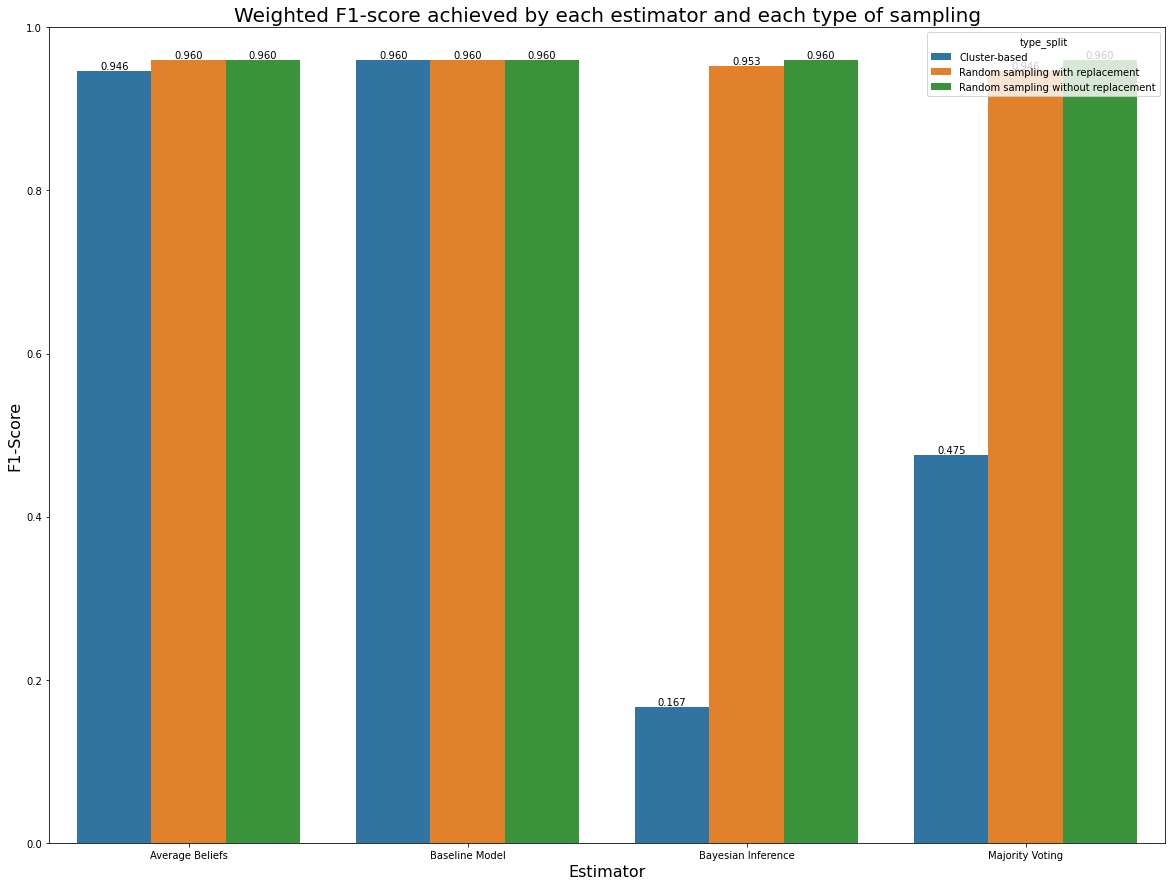

In [14]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(data=df, x='model_name', y='f1', hue='type_split')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.ylim(0, 1)
plt.title('Weighted F1-score achieved by each estimator and each type of sampling', fontdict=dict(size=20))
plt.xlabel('Estimator', fontdict=dict(size=16))
plt.ylabel('F1-Score', fontdict=dict(size=16))

## Test number estimators

In [15]:
df = results[results.type_split=='Random sampling with replacement']
df.drop('type_split', axis=1, inplace=True)
df = df.groupby(['model_name', 'num_estimators']).mean().reset_index()

/var/folders/7x/f99kq48n5_7cdmmy6sz268nw0000gn/T/ipykernel_67132/540570966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type_split', axis=1, inplace=True)


In [16]:
df

,model_name,num_estimators,fold,balanced_accuracy,f1
0,Average Beliefs,3,2.0,0.960000,0.959596
1,Average Beliefs,5,2.0,0.960000,0.959697
2,Baseline Model,3,2.0,0.960000,0.959697
3,Baseline Model,5,2.0,0.960000,0.959697
4,Bayesian Inference,3,2.0,0.953333,0.952604
5,Bayesian Inference,5,2.0,0.813333,0.787380
6,Majority Voting,3,2.0,0.946667,0.946330
7,Majority Voting,5,2.0,0.946667,0.946263


Text(0, 0.5, 'F1-Score')

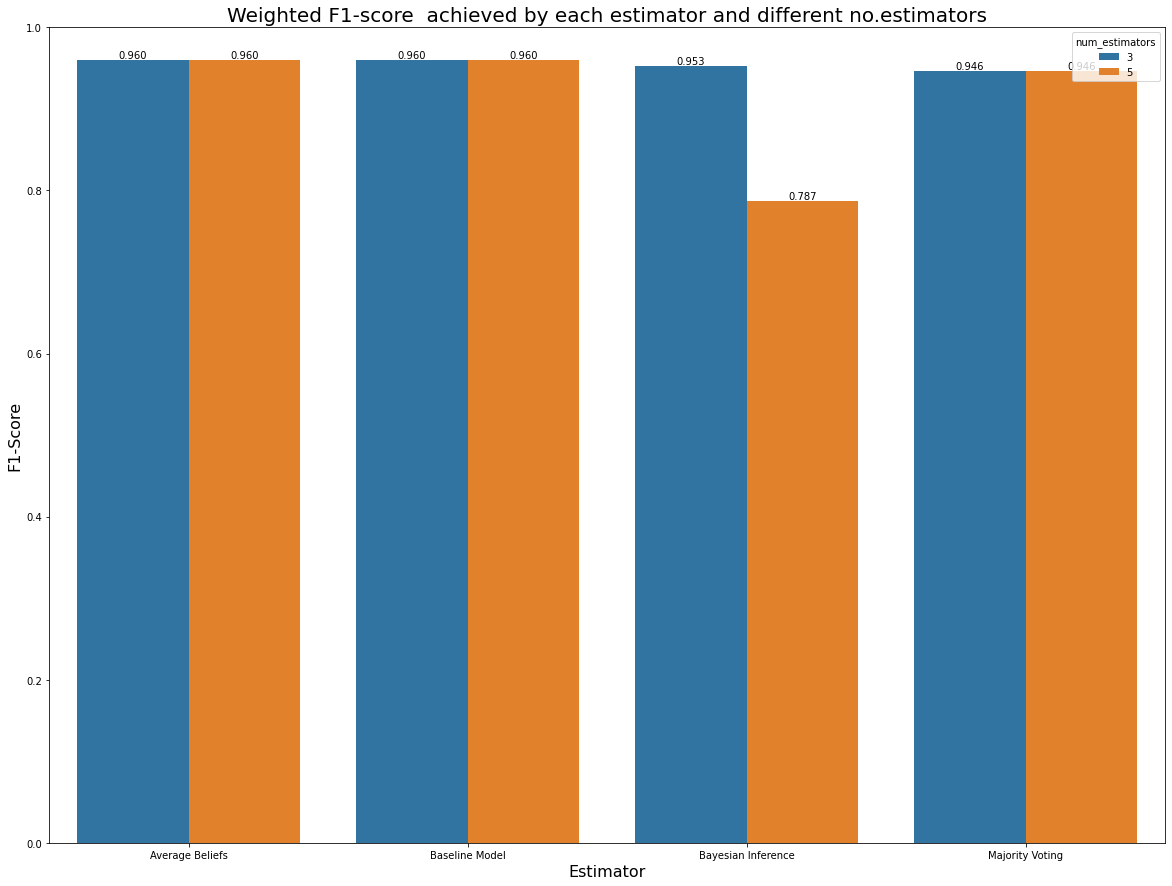

In [17]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(data=df, x='model_name', y='f1', hue='num_estimators')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.ylim(0, 1)
plt.title('Weighted F1-score  achieved by each estimator and different no.estimators', fontdict=dict(size=20))
plt.xlabel('Estimator', fontdict=dict(size=16))
plt.ylabel('F1-Score', fontdict=dict(size=16))